In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# reading the dataset using read_csv
df = pd.read_csv("stock_data.csv", parse_dates=True, index_col="Date")

# displaying the first five rows of dataset
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2013-02-08,NaN,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,NaN,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,NaN,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,NaN,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,NaN,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
# deleting column
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


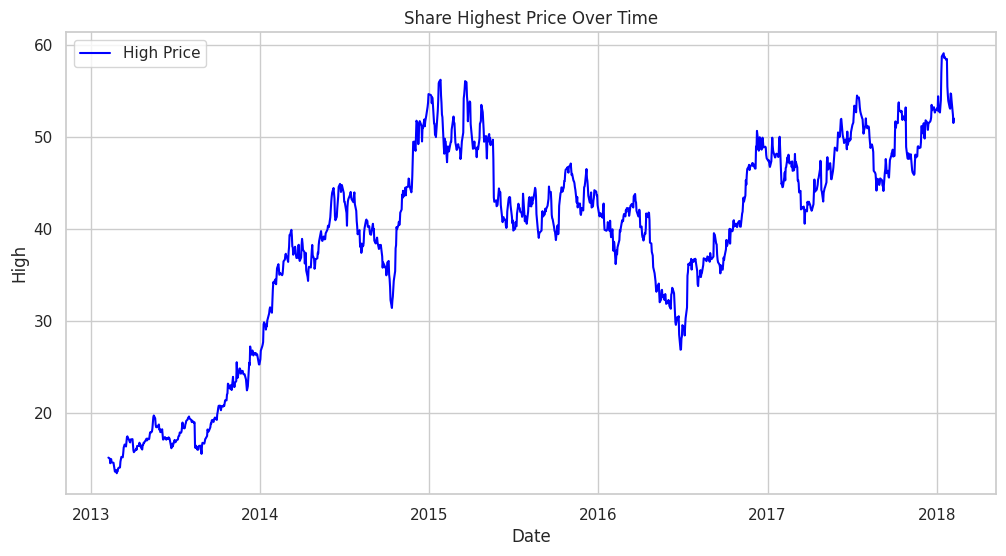

In [ ]:
# Assuming df is your DataFrame
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

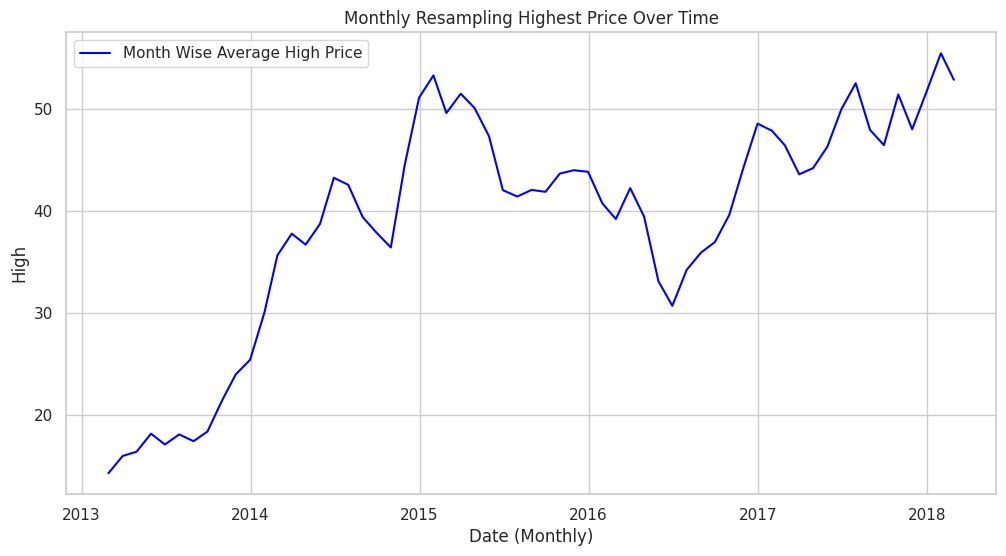

In [ ]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean(numeric_only=True) # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

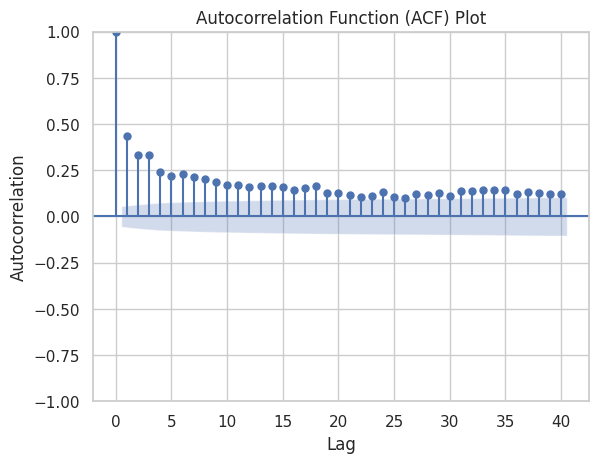

In [ ]:
# Check if 'Date' is already the index
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.0394210870439844
p-value: 0.2695601609296777
Critical Values: {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}


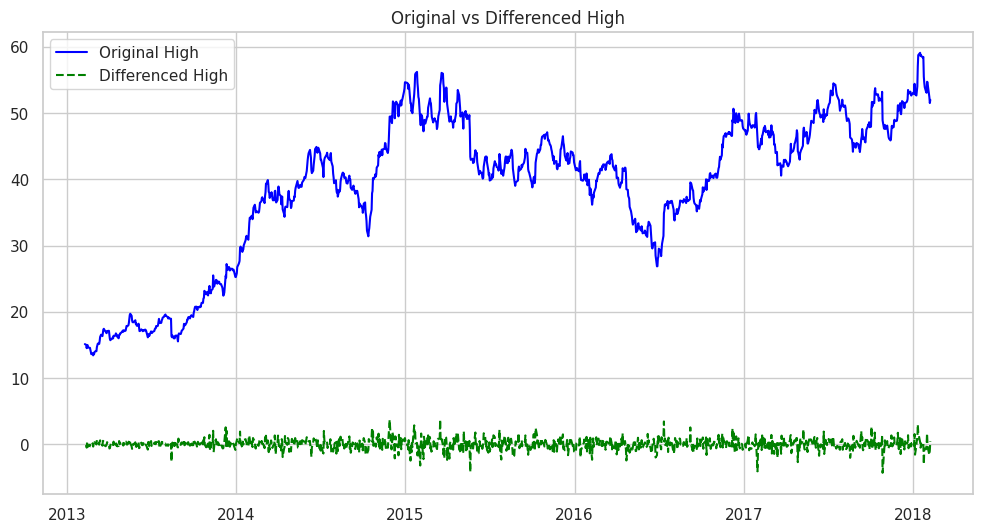

In [ ]:
# Differencing
df['high_diff'] = df['High'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

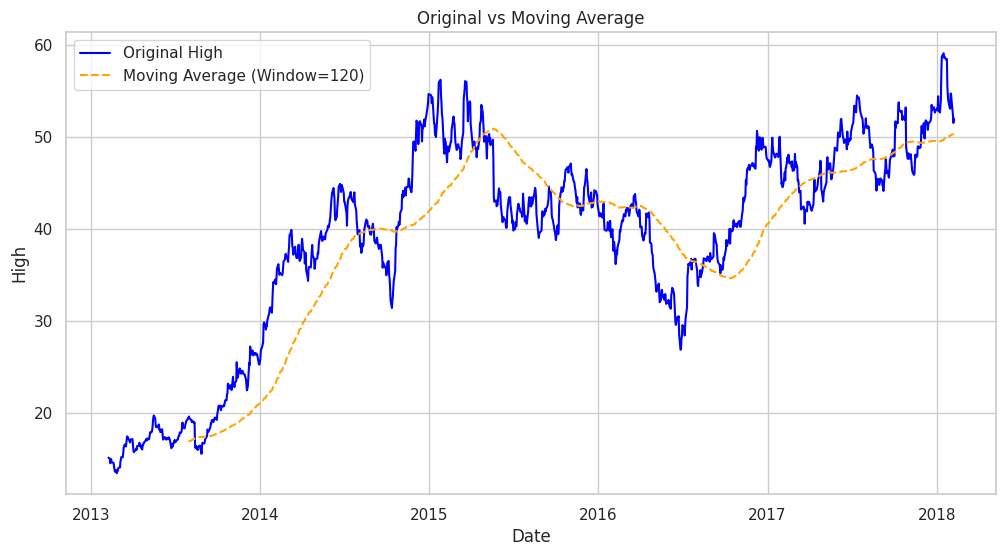

In [ ]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())

             High  high_diff
Date                        
2013-02-08  15.12        NaN
2013-02-11  15.01      -0.11
2013-02-12  14.51      -0.50
2013-02-13  14.94       0.43
2013-02-14  14.96       0.02


In [ ]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

,high_diff
Date,
2013-02-11,-0.11
2013-02-12,-0.50
2013-02-13,0.43
2013-02-14,0.02
2013-02-15,-0.35


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -30.782419342418
p-value: 0.0
Critical Values: {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}
